 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [179]:
# Import necessary libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [200]:
# Set file path for csv file using Path from pathlib 
whale_data= Path("./Resources/whale_returns.csv")

# Read whale returns file (set "Date" column as the index and convert "Date" to datetime) 
whale_df= pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [181]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [182]:
# Drop nulls
whale_df= whale_df.dropna().copy()

In [183]:
# Verfify nulls are dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [184]:
# Set file path for csv file using Path from pathlib 
algo_data= Path("./Resources/algo_returns.csv")
# Read algorithmic returns file (set "Date" column as the index and convert "Date" to datetime) 
algo_df= pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [185]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [186]:
# Drop nulls
algo_df = algo_df.dropna().copy()

In [187]:
# Verfify nulls are dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [201]:
# Set file path for csv file using Path from pathlib
sp_data= Path("./Resources/sp500_history.csv")

# Read S&P 500 Closing Prices file (set "Date" column as the index and convert "Date" to datetime)
sp_df= pd.read_csv(sp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index in ascending order to calculate daily returns
sp_df.sort_index(inplace=True)
sp_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [189]:
# Check Data Types.
sp_df.dtypes

Close    object
dtype: object

In [202]:
# Remove non-numeric values in "Close" column and convert data type to float for daily returns calculations
sp_df["Close"] = sp_df["Close"].str.replace("$", "")
sp_df["Close"] = sp_df["Close"].astype("float")
sp_df["Close"].head()

/var/folders/6b/gblf5hmj38lfr_531djzqrv00000gp/T/ipykernel_46742/3416776515.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_df["Close"] = sp_df["Close"].str.replace("$", "")


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
Name: Close, dtype: float64

In [203]:
# Calculate Daily Returns using ".pct_change" function
sp_daily_returns=sp_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [192]:
# Count nulls
sp_daily_returns.isnull().sum()

Close    1
dtype: int64

In [193]:
# Drop nulls
sp_daily_returns= sp_daily_returns.dropna().copy()

In [194]:
# Verfify nulls are dropped
sp_daily_returns.isnull().sum()

Close    0
dtype: int64

In [195]:
# Rename "Close" Column to "S&P500"
sp_daily_returns.columns=["S&P500"]
sp_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [197]:
# Using "concat", join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame
all_daily_returns=pd.concat([whale_df, algo_df, sp_daily_returns],axis="columns", join="inner")

# Sort datetime index in ascending order
all_daily_returns.sort_index(inplace=True)
all_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

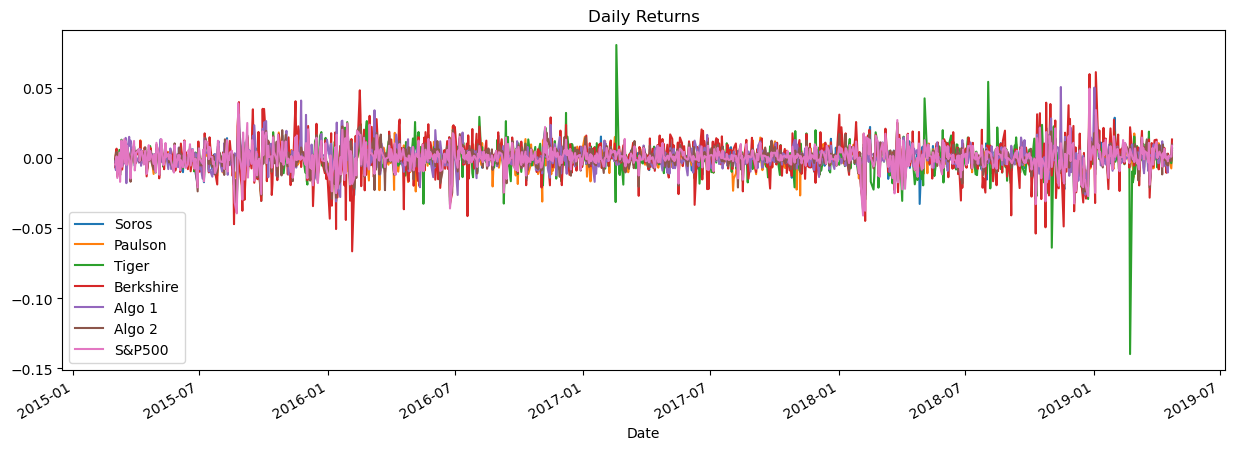

In [204]:
# Rename columns for better visualization
all_daily_returns.columns=["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2", "S&P500"]

# Plot daily returns of all portfolios
all_daily_returns.plot(legend=True,  figsize=(15, 5),  title="Daily Returns")

#### Calculate and Plot cumulative returns.

In [207]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_daily_returns).cumprod()

# Print last values of all portfolios using "iloc" and sort in descending order
print("Cumulative returns over time period:")
print(f"{cumulative_returns.iloc[-1].sort_values(ascending=False)}")

# To determine if any portfolio outperformed S&P500:
# set a variable with S&P500 cumulative return and and one with last value for all portfolios
sp_cumulative_return= cumulative_returns["S&P500"].iloc[-1]
cumulative_returns_last_value= cumulative_returns.iloc[-1]

# Create a loop to determine outperformance 
for portfolio, value in cumulative_returns_last_value.items():
    if value > sp_cumulative_return:
        print(f"{portfolio} outperformed S&P500 by {round(value-sp_cumulative_return,4)}")
        
# It is important to note that outperformance in this loop only takes into account cumulative rerturns

Cumulative returns over time period:
Algo 1       1.934691
Berkshire    1.553401
S&P500       1.385517
Algo 2       1.269247
Soros        1.164568
Tiger        0.861189
Paulson      0.779646
Name: 2019-04-23 00:00:00, dtype: float64
Berkshire outperformed S&P500 by 0.1679
Algo 1 outperformed S&P500 by 0.5492


<Axes: title={'center': 'Cumulative Returns over time period'}, xlabel='Date'>

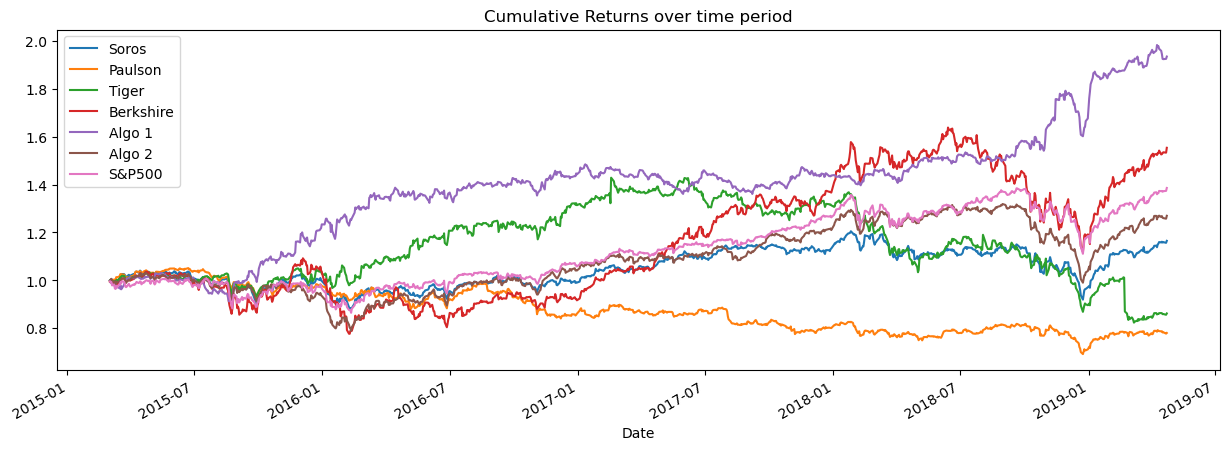

In [208]:
# Plot cumulative returns for all portfolios 
cumulative_returns.plot(figsize=(15,5), title="Cumulative Returns over time period")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

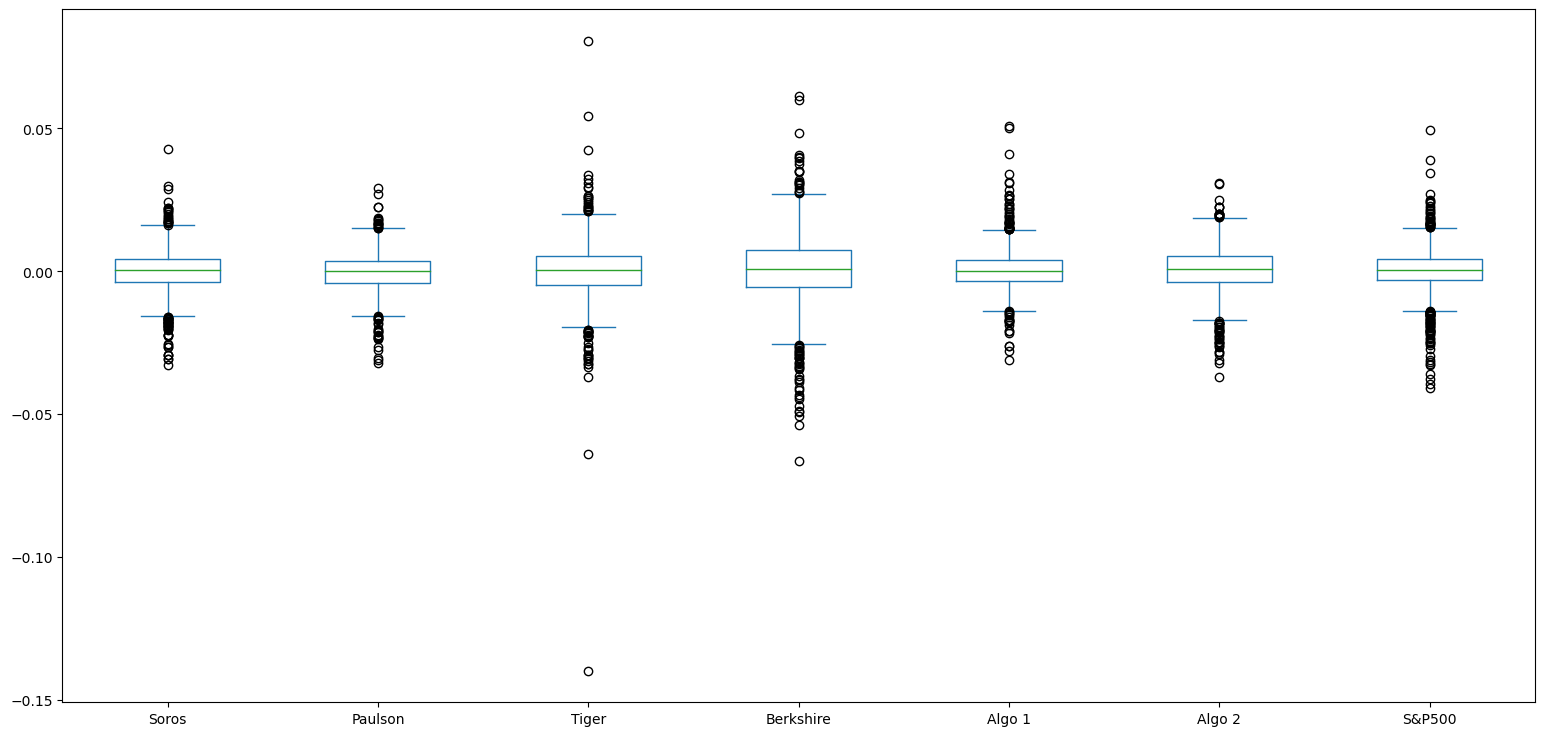

In [209]:
# Box plot to visually show risk
all_daily_returns.plot.box(figsize=(19, 9))

### Calculate Standard Deviations

In [210]:
# Calculate the daily standard deviations of all portfolios and sort values
all_portfolios_std= all_daily_returns.std().sort_values(ascending=False)
all_portfolios_std

Berkshire    0.012919
Tiger        0.010894
S&P500       0.008554
Algo 2       0.008342
Soros        0.007895
Algo 1       0.007620
Paulson      0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [211]:
# Set a variable to calculate the daily standard deviation of S&P 500
sp_std= all_daily_returns["S&P500"].std()
print(f"S&P500 standard deviation: {sp_std}")

# Using a loop, determine which portfolios are riskier than the S&P 500
for portfolio, value in all_portfolios_std.items():
    if value> sp_std:
        print(f"{portfolio} is riskier than S&P500")



S&P500 standard deviation: 0.008553731597758204
Berkshire is riskier than S&P500
Tiger is riskier than S&P500


### Calculate the Annualized Standard Deviation

In [61]:
# Calculate the annualized standard deviation 
# Multiplying it by the square root of the number of trading days (252) (using Numpy)
annualized_std = all_portfolios_std * np.sqrt(252)
annualized_std.sort_values(ascending=False, inplace=True) 
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P500
Date,,,,,,,
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.006094
2019-04-23,0.004315,0.005695,0.004949,0.006602,0.005889,0.005582,0.004325


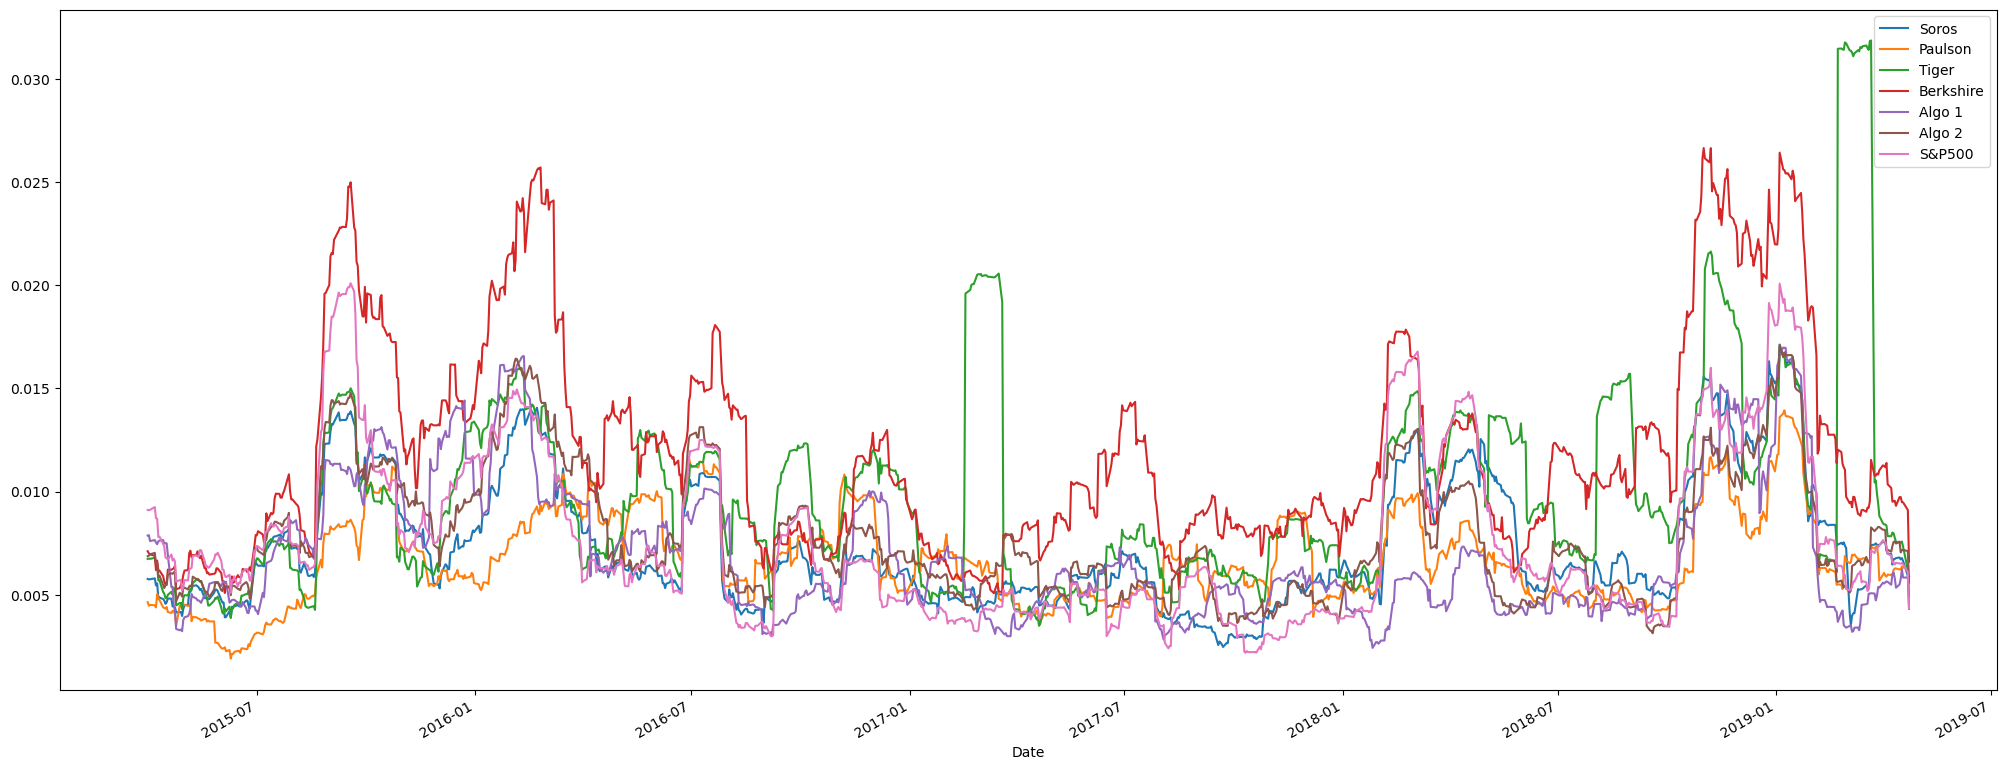

In [212]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std=all_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(25,10))
rolling_std.tail()

### Calculate and plot the correlation

In [213]:
# Calculate the correlation using ".corr"
correlation = all_daily_returns.corr()

# Display de correlation matrix
correlation



,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P500
Soros,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
Paulson,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
Tiger,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
Berkshire,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<Axes: >

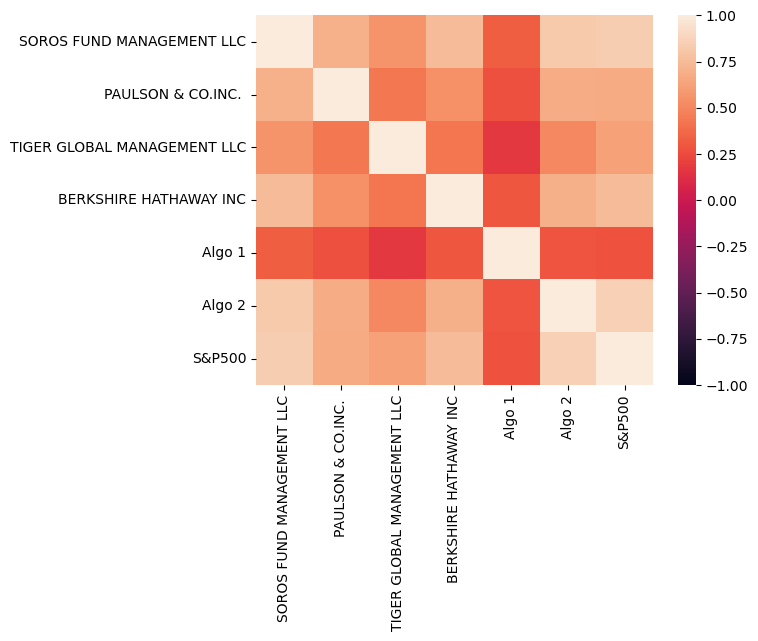

In [93]:
# Use `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance: 1.8217749991632744e-05
Variance: 7.316632424648712e-05
Beta: 0.24899091459425637


<Axes: title={'center': 'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

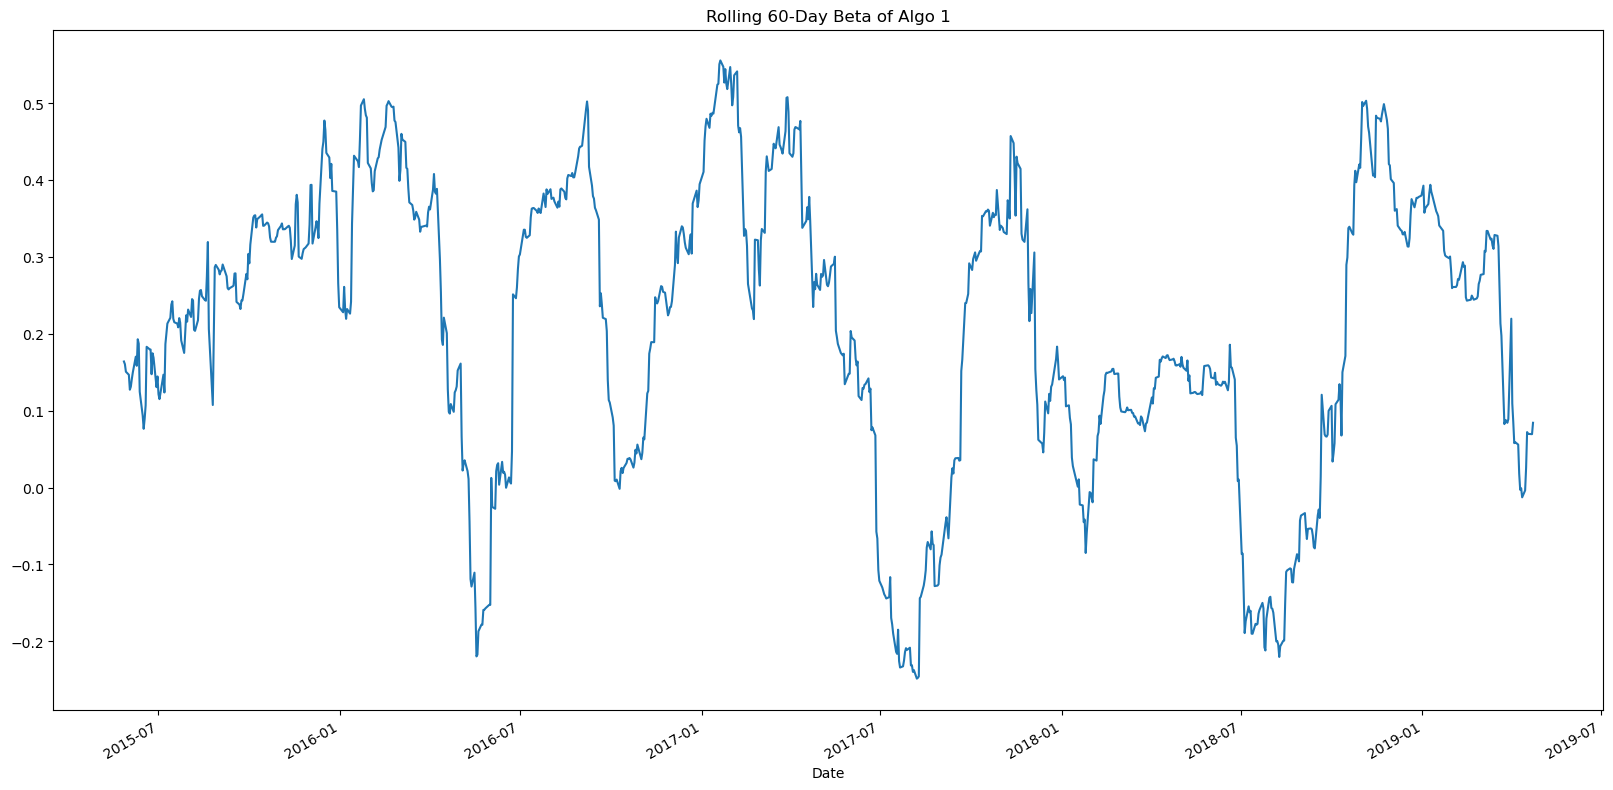

In [214]:
# Calculate covariance of a single portfolio
covariance= all_daily_returns["Algo 1"].cov(all_daily_returns["S&P500"])
print(f"Covariance: {covariance}")

# Calculate variance of S&P 500
variance = all_daily_returns["S&P500"].var()
print(f"Variance: {variance}")

# Computing beta (covariance/variance)
algo1_beta= covariance/variance
print(f"Beta: {algo1_beta}")

# Plot beta trend (60-day rolling beta) (rolling covariance/ rolling variance)
# get 60 Day rolling covariance
rolling_covariance = all_daily_returns["Algo 1"].rolling(window=60).cov(all_daily_returns["S&P500"])
# get 60 Day rolling variance
rolling_variance = all_daily_returns["S&P500"].rolling(window=60).var()

# Calculate 60-day rolling beta
rolling_beta = rolling_covariance/ rolling_variance
rolling_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [98]:
# Use `ewm` to calculate the rolling window
exp_weighted_avg=all_daily_returns.ewm(halflife=21, axis=1).std()
exp_weighted_avg.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,0.002627,0.002406,0.002939,0.002608,0.002480,0.002360
2015-03-04,NaN,0.000715,0.003113,0.003024,0.005418,0.004952,0.004816
2015-03-05,NaN,0.000042,0.000985,0.001840,0.002888,0.002605,0.002512
2015-03-06,NaN,0.003063,0.002688,0.003929,0.003715,0.003670,0.004043
2015-03-09,NaN,0.002576,0.002683,0.003445,0.004595,0.004087,0.003911


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [215]:
# Annualized Sharpe Ratios
# Assume 0 for risk free rate
sharpe_ratios = (all_daily_returns.mean() * 252) / (all_daily_returns.std() * np.sqrt(252))
sharpe_ratios

Soros        0.356417
Paulson     -0.483570
Tiger       -0.121060
Berkshire    0.621810
Algo 1       1.378648
Algo 2       0.501364
S&P500       0.648267
dtype: float64

<Axes: title={'center': 'Sharp Ratios'}>

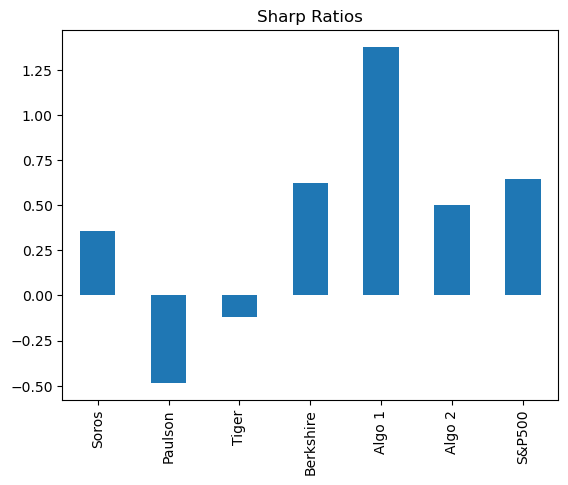

In [217]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharp Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Taking into consideration the different metrics calculated above, it is safe to say that the algorithmic strategies 1 outperformed the (S&P 500) and the whales portfolios.

Looking at cumulative returns, Algo 1 beat both the market (S&P 500) and BERKSHIRE HATHAWAY INC which had the greater cumulative return for the whales portfolios. Looking at the cumulative return graph, we can see that Algo 1 has beaten the market over the evaluated time period. With an annualized standar deviation of 0.1209 and a beta of 0.2489, it showed less volatilty than the S&P 500 (std= 0.1356), BERKSHIRE HATHAWAY INC (std= 0.205077) and most of whales portfolios. Additionally, when looking at the heatmap, we can see that it is the least correlated portfolio amongst all. Algo 1 had the highest sharp ratio which implies a better risk-adjusted performance.

Eventhough Algo 2 did not beat the market in cumulative returns or sharp ratio, it had better cumulative returns and sharp ratio than the whales portfolio (excluding BERKSHIRE HATHAWAY INC). When looking at the volatility, it returned a lower standar deviation (std= 0.1324) than the SP&500 (std= 0.1356) and two of the whales portforlios (TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC). 

Above all the porftolios evaluated Algo 1 returned better results. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock


In [32]:
# Reading data from 2nd stock


In [33]:
# Reading data from 3rd stock


In [34]:
# Combine all stocks in a single DataFrame


In [35]:
# Reset Date index


In [36]:
# Reorganize portfolio data by having a column per symbol


In [37]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [42]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [43]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [44]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios


In [46]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!